In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import os
import time

# Tensorflow 2.0 way of doing things
from tensorflow.keras.layers import InputLayer, Dense
from tensorflow.keras.models import Sequential

# Default plotting parameters
FONTSIZE = 18
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = FONTSIZE

In [3]:
def build_model(n_inputs, n_hidden, n_output, activation='elu', lrate=0.001):
    model = Sequential();
    model.add(InputLayer(input_shape=(n_inputs,)))
    model.add(Dense(n_hidden, use_bias=True, name="hidden", activation=activation))
    model.add(Dense(n_output, use_bias=True, name="output", activation=activation))
    
    opt = tf.keras.optimizers.Adam(lr=lrate, beta_1=0.9, beta_2=0.999,
                                epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss='mse', optimizer=opt)
    print(model.summary())
    return model

In [5]:
# Create training set: XOR
ins = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outs = np.array([[0], [1], [1], [0]])

In [11]:
model = build_model(ins.shape[1], 2, outs.shape[1], activation='sigmoid')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 2)                 6         
_________________________________________________________________
output (Dense)               (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
# Training
history = model.fit(x=ins, y=outs, epochs=8000, verbose=False)

Text(0.5, 0, 'epochs')

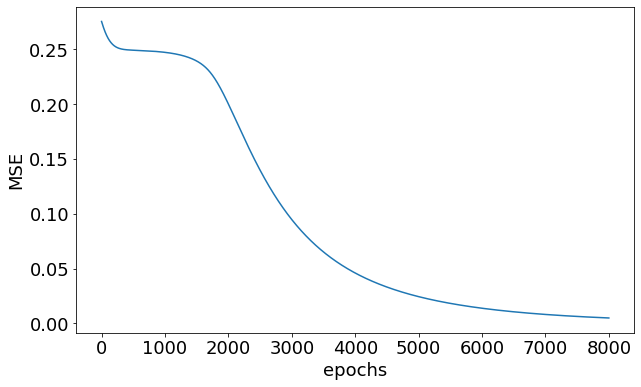

In [13]:
# Display
plt.plot(history.history['loss'])
plt.ylabel('MSE')
plt.xlabel('epochs')

In [14]:
model.predict(ins)

array([[0.07205418],
       [0.9393718 ],
       [0.92166126],
       [0.07102913]], dtype=float32)

## Training with Logging

In [18]:
model = build_model(ins.shape[1], 5, outs.shape[1], activation='sigmoid')
checkpoint_cb = keras.callbacks.ModelCheckpoint("xor_model.h5",
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=100,
                                                 restore_best_weights=True,
                                                 min_delta=.00001)


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 5)                 15        
_________________________________________________________________
output (Dense)               (None, 1)                 6         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________
None


In [19]:
# Note: faking validation data to get the checkpoints to work properly
history = model.fit(x=ins, y=outs, epochs=20000, verbose=False,
                    validation_data=(ins, outs),
                   callbacks=[checkpoint_cb, early_stopping_cb])

Text(0.5, 0, 'epochs')

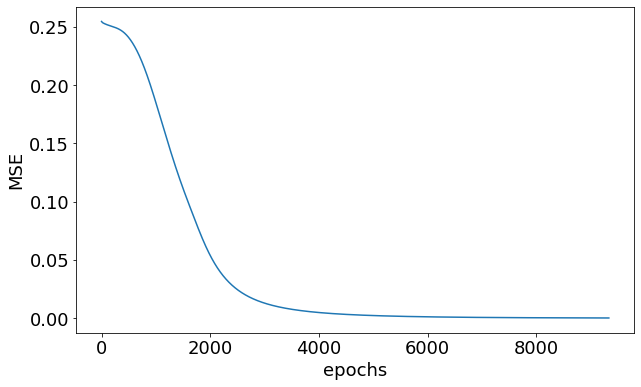

In [20]:
# Display
plt.plot(history.history['loss'])
plt.ylabel('MSE')
plt.xlabel('epochs')

In [21]:
model.predict(ins)

array([[0.0146002 ],
       [0.9832653 ],
       [0.99038893],
       [0.01222534]], dtype=float32)

## Adding Tensorboard

In [35]:
root_logdir = "my_logs"

In [42]:
this_log_dir = os.path.join(root_logdir, "xor", time.strftime("_%Y_%m_%d_%H_%M_%S"))
model = build_model(ins.shape[1], 5, outs.shape[1], activation='sigmoid')
checkpoint_cb = keras.callbacks.ModelCheckpoint("xor_model.h5",
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=100,
                                                 restore_best_weights=True,
                                                  min_delta=.0001)
tensorboard_cb = keras.callbacks.TensorBoard(this_log_dir)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 5)                 15        
_________________________________________________________________
output (Dense)               (None, 1)                 6         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________
None


In [43]:
# Note: faking validation data to get the checkpoints to work properly
history = model.fit(x=ins, y=outs, epochs=20000, verbose=False,
                    validation_data=(ins, outs),
                   callbacks=[checkpoint_cb, early_stopping_cb, 
                             tensorboard_cb])

In [44]:
model.predict(ins)

array([[0.0391393 ],
       [0.9706835 ],
       [0.95109993],
       [0.04208888]], dtype=float32)